# HR Employee Attrition dataset Analysis  

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Replace 'your_hr_attrition_dataset.csv' with your dataset path
hr_data = pd.read_csv('E:/Internship on data analysis/Project3/HR-Employee-Attrition.csv')
hr_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [13]:
# Display the first few rows of the dataset
hr_data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
# Summary statistics
print(hr_data.describe())

# Data types and missing values
print(hr_data.info())

# Unique values in categorical columns
categorical_columns = hr_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {hr_data[col].unique()}")


               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

Attrition
No     1233
Yes     237
Name: count, dtype: int64


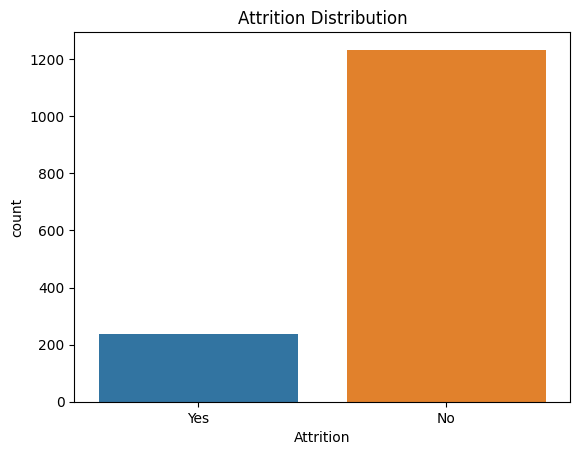

In [15]:
# Count the number of employees with and without attrition
attrition_counts = hr_data['Attrition'].value_counts()
print(attrition_counts)

# Visualize attrition
sns.countplot(x='Attrition', data=hr_data)
plt.title("Attrition Distribution")
plt.show()


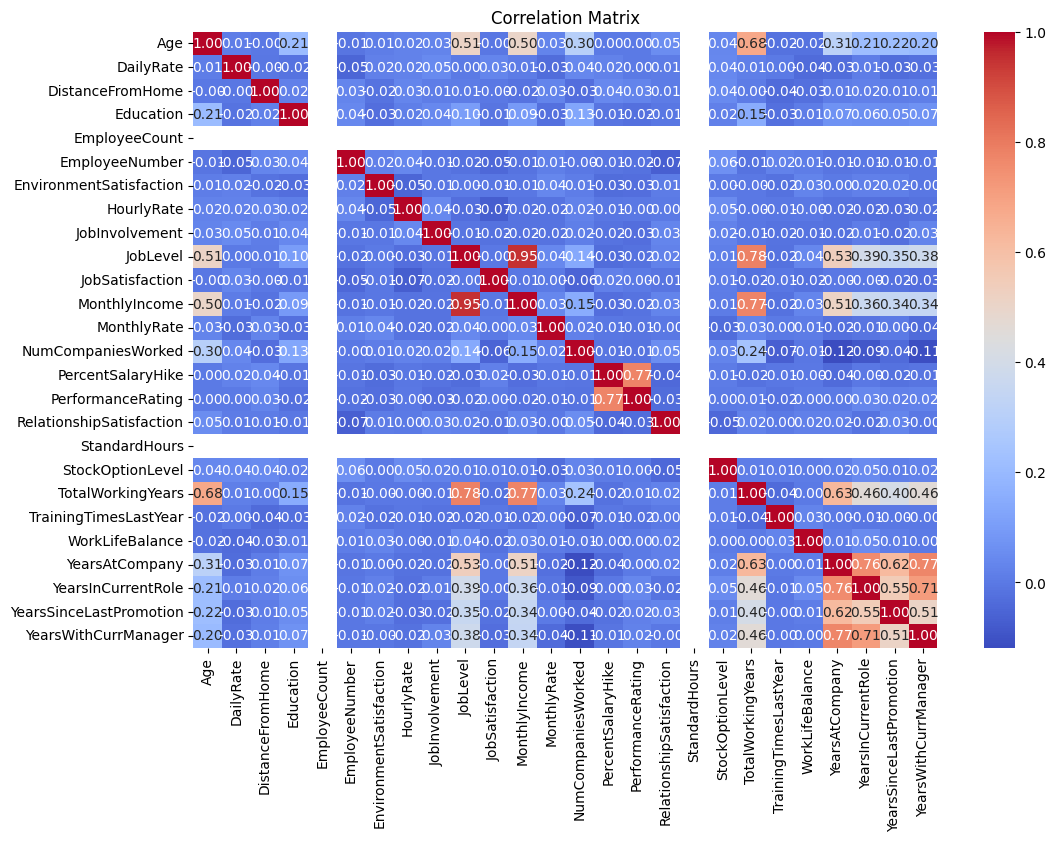

In [21]:
# Select only numeric columns for correlation analysis
numeric_columns = hr_data.select_dtypes(include=[float, int]).columns

# Compute the correlation matrix
correlation_matrix = hr_data[numeric_columns].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



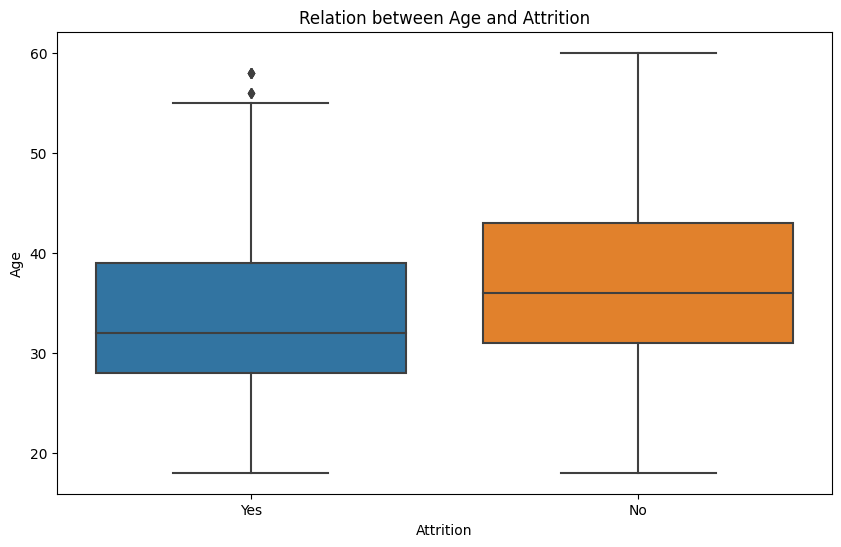

In [17]:
# Relation between Age and Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=hr_data)
plt.title("Relation between Age and Attrition")
plt.show()


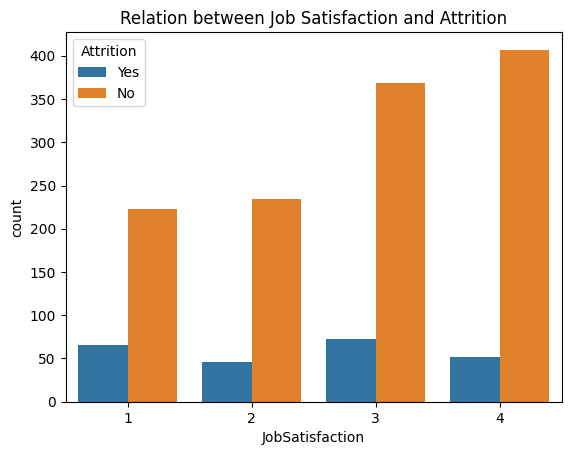

In [18]:
# Relation between Job Satisfaction and Attrition
sns.countplot(x='JobSatisfaction', hue='Attrition', data=hr_data)
plt.title("Relation between Job Satisfaction and Attrition")
plt.show()

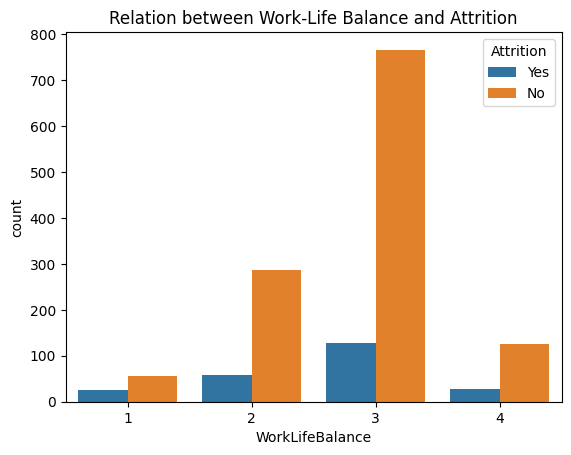

In [19]:
# Relation between Work-Life Balance and Attrition
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=hr_data)
plt.title("Relation between Work-Life Balance and Attrition")
plt.show()
